In [1]:
import pandas as pd
import numpy as np
import pm4py
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
import ipywidgets as widgets
from ipywidgets import interactive
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np
import pandas as pd

from create_sample import create_sample_log

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
dataframe = pd.read_csv('C:\Code\Github\WISE\wise_flow\data\BPI_Challenge_2019.csv', sep=',')
#log = create_sample_log(dataframe, 1000)
log = pm4py.read_xes('C:\Code\Github\WISE\wise_flow\\tests\data\BPI_Challenge_2019_sample.xes')
start_activities = pm4py.get_start_activities(log)
end_activities = pm4py.get_end_activities(log)
print(f"Start activities: {start_activities} \nEnd activities: {end_activities} \n")

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

Start activities: {'Vendor creates invoice': 84, 'SRM: Created': 2, 'Record Goods Receipt': 148, 'Clear Invoice': 73, 'Create Purchase Order Item': 425, 'Delete Purchase Order Item': 3, 'Change Quantity': 11, 'Record Invoice Receipt': 101, 'Create Purchase Requisition Item': 108, 'Reactivate Purchase Order Item': 1, 'Change Approval for Purchase Order': 4, 'Receive Order Confirmation': 9, 'Vendor creates debit memo': 2, 'Record Service Entry Sheet': 7, 'Cancel Invoice Receipt': 4, 'Remove Payment Block': 14, 'Cancel Goods Receipt': 1, 'Set Payment Block': 1, 'Change Price': 2} 
End activities: {'Vendor creates invoice': 70, 'Cancel Goods Receipt': 3, 'Clear Invoice': 353, 'Record Invoice Receipt': 219, 'Create Purchase Order Item': 107, 'Record Goods Receipt': 128, 'Remove Payment Block': 50, 'Receive Order Confirmation': 13, 'Delete Purchase Order Item': 21, 'Cancel Invoice Receipt': 7, 'Change Price': 6, 'Change Quantity': 6, 'Vendor creates debit memo': 2, 'Change Approval for Purch

In [4]:
filtered_log = pm4py.filter_start_activities(log, {'SRM: Created'})
filtered_log = pm4py.filter_end_activities(filtered_log, {'Cancel Goods Receipt'})

print(f"Filtered log: {filtered_log} \n")

Filtered log:              eventID case_Spend_area_text    case_Company case_Document_Type  \
464  188007898415104            Marketing  companyID_0000  EC Purchase order   
465  188007898415108            Marketing  companyID_0000  EC Purchase order   
466  188007898415105            Marketing  companyID_0000  EC Purchase order   
467  188007898415109            Marketing  companyID_0000  EC Purchase order   
468  188007898415111            Marketing  companyID_0000  EC Purchase order   
469  188007898415106            Marketing  companyID_0000  EC Purchase order   
470  188007898415107            Marketing  companyID_0000  EC Purchase order   
471  188007898415110            Marketing  companyID_0000  EC Purchase order   
472  188007898415112            Marketing  companyID_0000  EC Purchase order   
473  188007898415113            Marketing  companyID_0000  EC Purchase order   
474  188007898415114            Marketing  companyID_0000  EC Purchase order   

    case_Sub_spend_area_t

In [5]:
for t in log:
    print(t)
trace_log = pm4py.filter_trace(lambda x: len(x) > 15, log)
print(f"Number of traces: {len(trace_log)}")

eventID
case_Spend_area_text
case_Company
case_Document_Type
case_Sub_spend_area_text
case_Purchasing_Document
case_Purch._Doc._Category_name
case_Vendor
case_Item_Type
case_Item_Category
case_Spend_classification_text
case_Source
case_Name
case_GR-Based_Inv._Verif.
case_Item
case_concept_name
case_Goods_Receipt
event_User
event_org_resource
event_concept_name
event_Cumulative_net_worth_(EUR)
event_time_timestamp
concept:name
time:timestamp
@@index
@@case_index
case:concept:name
Number of traces: 6567


c:\Users\jessen_u\AppData\Local\miniconda3\envs\WISE\Lib\site-packages\pm4py\hof.py:66: UserWarning: input trace object is not of the appropriate type, filter() not applied
  warnings.warn('input trace object is not of the appropriate type, filter() not applied')


In [6]:
log.head(2)

,eventID,case_Spend_area_text,case_Company,case_Document_Type,case_Sub_spend_area_text,case_Purchasing_Document,case_Purch._Doc._Category_name,case_Vendor,case_Item_Type,case_Item_Category,case_Spend_classification_text,case_Source,case_Name,case_GR-Based_Inv._Verif.,case_Item,case_concept_name,case_Goods_Receipt,event_User,event_org_resource,event_concept_name,event_Cumulative_net_worth_(EUR),event_time_timestamp,concept:name,time:timestamp,@@index,@@case_index,case:concept:name
0,536870912000,Marketing,companyID_0000,EC Purchase order,Digital Marketing,2000000100,Purchase order,vendorID_0053,Service,"3-way match, invoice after GR",NPR,sourceSystemID_0000,vendor_0053,True,1,2000000100_00001,True,NONE,NONE,Vendor creates invoice,7815013.0,2017-01-31 23:59:00+00:00,Vendor creates invoice,2017-01-31 23:59:00+00:00,4001,125,2000000100_00001
1,536870912001,Marketing,companyID_0000,EC Purchase order,Digital Marketing,2000000100,Purchase order,vendorID_0053,Service,"3-way match, invoice after GR",NPR,sourceSystemID_0000,vendor_0053,True,1,2000000100_00001,True,NONE,NONE,Vendor creates invoice,7815013.0,2017-05-25 23:59:00+00:00,Vendor creates invoice,2017-05-25 23:59:00+00:00,4002,125,2000000100_00001


In [7]:
# dataframe = pd.DataFrame({'event_Cumulative_net_worth_(EUR)': np.random.randint(0, 1000000, 1000)})

sns.set(style="whitegrid")

def plot_filtered_data(lower_bound, upper_bound):
    # Filter the dataframe for the selected range
    filtered_df = log[(log['event_Cumulative_net_worth_(EUR)'] >= lower_bound) & (log['event_Cumulative_net_worth_(EUR)'] <= upper_bound)]

    plt.figure(figsize=(10, 6))
    ax = sns.kdeplot(filtered_df['event_Cumulative_net_worth_(EUR)'], fill=True, bw_adjust=0.5)
    
    # Formatting for the x-axis ticks
    def format_eur(value, tick_position):
        if value >= 1e6:
            value_str = f'{value/1e6:.1f}M'
        elif value >= 1e3:
            value_str = f'{value/1e3:.1f}K'
        else:
            value_str = str(int(value))
        return value_str

    ax.xaxis.set_major_formatter(FuncFormatter(format_eur))
    
    plt.xlabel('Net Worth (EUR)')
    plt.ylabel('Density')
    plt.title('Distribution of Net Worth in Selected Range')
    plt.show()

# Widgets for selecting the data range
lower_bound_selector = widgets.IntSlider(min=0, max=500000, step=1000, value=0, description='Lower Bound (EUR):', continuous_update=False)
upper_bound_selector = widgets.IntSlider(min=0, max=500000, step=1000, value=500000, description='Upper Bound (EUR):', continuous_update=False)

interactive_plot = interactive(plot_filtered_data, lower_bound=lower_bound_selector, upper_bound=upper_bound_selector)
interactive_plot

interactive(children=(IntSlider(value=0, continuous_update=False, description='Lower Bound (EUR):', max=500000…

In [8]:
num_cases = len(log)
num_events = sum(len(case) for case in log)
print(f"Number of cases: {num_cases}")
print(f"Number of events: {num_events}")

Number of cases: 6567
Number of events: 457


In [9]:
# Find the row with the earliest timestamp
first_event = dataframe[dataframe['event_time_timestamp'] == dataframe['event_time_timestamp'].min()]

# Find the row with the latest timestamp
last_event = dataframe[dataframe['event_time_timestamp'] == dataframe['event_time_timestamp'].max()]

print(first_event['event_time_timestamp'])
print(last_event['event_time_timestamp'])


#using pm4py filter out cases with events that are earlier than 2010-01-01 and later than 2019-12-31
filtered_log = pm4py.filter_time_range(log, "2010-01-01 00:00:00", "2019-12-31 23:59:59", mode='traces_contained')

num_cases = len(filtered_log)
num_events = sum(len(case) for case in filtered_log)
print(f"Number of cases in filtered_log: {num_cases}")
print(f"Number of events in filtered_log: {num_events}")

318    01-01-2018 03:42:00.000
Name: event_time_timestamp, dtype: object
1550520    31-12-2018 23:59:00.000
1550521    31-12-2018 23:59:00.000
1550522    31-12-2018 23:59:00.000
1550523    31-12-2018 23:59:00.000
1550524    31-12-2018 23:59:00.000
1550525    31-12-2018 23:59:00.000
1550526    31-12-2018 23:59:00.000
1550527    31-12-2018 23:59:00.000
1550528    31-12-2018 23:59:00.000
1550529    31-12-2018 23:59:00.000
1550530    31-12-2018 23:59:00.000
1550531    31-12-2018 23:59:00.000
1550532    31-12-2018 23:59:00.000
1550533    31-12-2018 23:59:00.000
1550534    31-12-2018 23:59:00.000
1550535    31-12-2018 23:59:00.000
1550536    31-12-2018 23:59:00.000
1550537    31-12-2018 23:59:00.000
1550538    31-12-2018 23:59:00.000
1550539    31-12-2018 23:59:00.000
1550540    31-12-2018 23:59:00.000
1550541    31-12-2018 23:59:00.000
1550542    31-12-2018 23:59:00.000
1550543    31-12-2018 23:59:00.000
1550544    31-12-2018 23:59:00.000
1550545    31-12-2018 23:59:00.000
1550546    31-12-

In [10]:
dataframe.columns

Index(['eventID', 'case_Spend_area_text', 'case_Company', 'case_Document_Type',
       'case_Sub_spend_area_text', 'case_Purchasing_Document',
       'case_Purch._Doc._Category_name', 'case_Vendor', 'case_Item_Type',
       'case_Item_Category', 'case_Spend_classification_text', 'case_Source',
       'case_Name', 'case_GR-Based_Inv._Verif.', 'case_Item',
       'case_concept_name', 'case_Goods_Receipt', 'event_User',
       'event_org_resource', 'event_concept_name',
       'event_Cumulative_net_worth_(EUR)', 'event_time_timestamp'],
      dtype='object')

In [11]:
dataframe.case_Item_Category.value_counts() 
dict = {'3-way match, invoice after GR':'DF1', '3-way match, invoice before GR':'DF2', '2-way match':'DF3', 'Consignment':'DF4'}
#create a new column with the description of the item category
dataframe['description'] = dataframe['case_Item_Category'].map(dict)

In [12]:
dataframe.groupby('description')['case_concept_name'].nunique()

description
DF1     15182
DF2    221010
DF3      1044
DF4     14498
Name: case_concept_name, dtype: int64

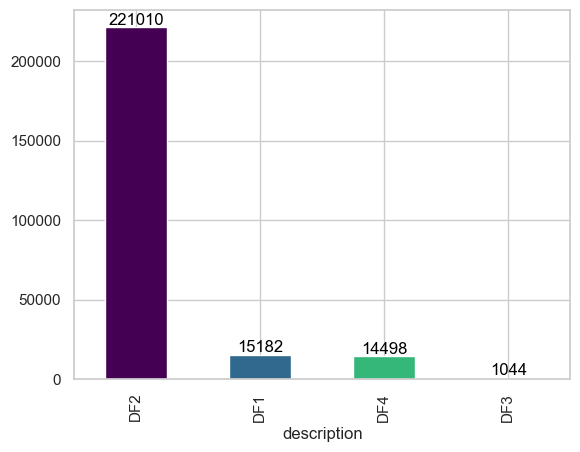

In [13]:
def visualize_column(df, column_name, caseId=False):
    if caseId:
        # Grouping by 'case_Item_Category' and counting unique 'case_concept_name' values
        unique_counts = df.groupby(column_name)['case_concept_name'].nunique()
    else:
        # Counting the occurrences of each value in the column
        unique_counts = df[column_name].value_counts()

    # Sorting the counts for better visualization (optional)
    unique_counts_sorted = unique_counts.sort_values(ascending=False)

    # Generating a list of colors for each bar, using the number of unique groups
    colors = plt.cm.viridis(np.linspace(0, 1, len(unique_counts_sorted)))

    # Plotting the bar chart
    ax = unique_counts_sorted.plot(kind='bar', color=colors)

    # Adding labels on each bar
    ax.bar_label(ax.containers[0], fmt='%d', label_type='edge', color='black')

    plt.show()

visualize_column(dataframe, 'description', caseId=True)

In [14]:
dataframe_energy = dataframe[dataframe['case_Spend_area_text'] == 'Energy']
len(dataframe_energy.case_concept_name.unique())    

15

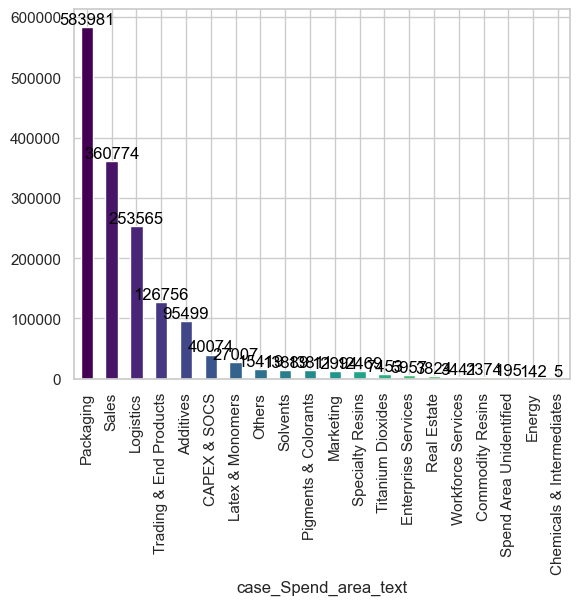

In [15]:

visualize_column(dataframe, 'case_Spend_area_text')

In [17]:
k = 2
filtered_log = pm4py.filter_variants_top_k(log, k)
print(filtered_log[0])

KeyError: 0

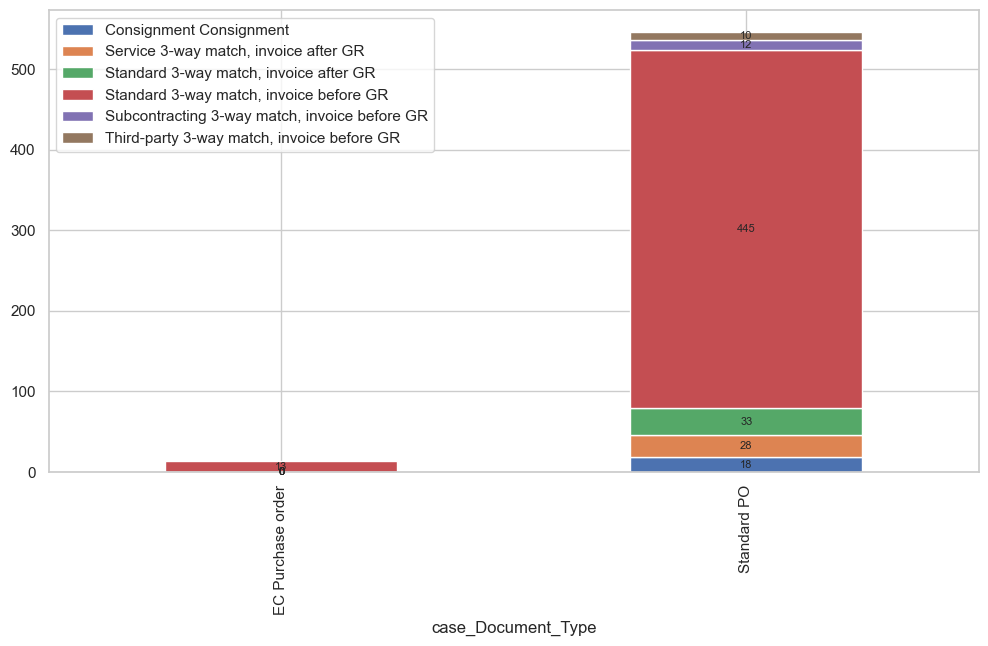

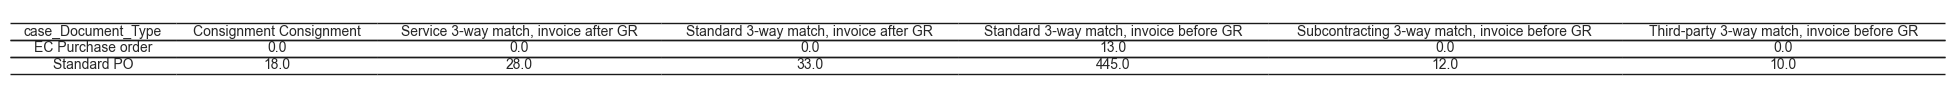

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table

def create_stacked_bar_and_table(df, index_col, col1, col2):
    """
    Creates a stacked bar chart and a separate table plot.

    Parameters:
    - df: DataFrame containing the data.
    - index_col: The name of the column to be used as the index for grouping.
    - col1: The name of the first column to be used for creating subgroups.
    - col2: The name of the second column to be used for creating subgroups.
    """
    
    # Group and pivot the data
    grouped = df.groupby([index_col, col1, col2]).size().reset_index(name='count')
    pivot_df = grouped.pivot_table(index=index_col, 
                                   columns=[col1, col2], 
                                   values='count', 
                                   fill_value=0)

    # Flatten the MultiIndex columns for plotting
    pivot_df.columns = [' '.join(col).strip() for col in pivot_df.columns.values]

    # Plot the stacked bar chart
    fig, ax = plt.subplots(figsize=(12, 6))
    pivot_df.plot(kind='bar', stacked=True, ax=ax)

    # Annotate bars with values
    for container in ax.containers:
        ax.bar_label(container, label_type='center', fontsize=8)

    plt.show()

    # Create the table plot
    fig, ax = plt.subplots(figsize=(12, 0.5 * len(pivot_df)))
    ax.axis('tight')
    ax.axis('off')
    table_data = pivot_df.reset_index().values
    colLabels = pivot_df.reset_index().columns.tolist()
    table_ax = ax.table(cellText=table_data, colLabels=colLabels, loc='center', cellLoc='center', edges='horizontal')
    table_ax.auto_set_font_size(False)
    table_ax.set_fontsize(10)
    table_ax.auto_set_column_width(col=list(range(len(colLabels)))) # Provide automatic width to columns
    plt.show()

create_stacked_bar_and_table(dataframe,  'case_Document_Type', 'case_Item_Type','case_Item_Category')
